#**Hello Everyone 👋**#

A very warm Good Morning to everyone!!
This is Dev, and I welcome you all in my session again.

The agenda for today's session is going to be Case Study based upon the AirBnB. We together will try to understand and uncover some hidden information that underlies within the given data.

We would begin in few minutes with this agenda.

Thank You

**AirBnb**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

**Business Problem**

What can we learn about different hosts and areas?

What can we learn from predictions? (ex: locations, prices, reviews, etc)

Which hosts are the busiest and why?

Is there any noticeable difference of traffic among different areas and what could be the reason for it?

Dataset Story
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

The data contains 48895 rows and 16 columns.

The data contains information about the id, host name, host_id, host_name, neighbourhood_group, neighbouhood, latitude, longitude, room type, price, minimum number of nights, number of reviews, last review, reviews per month, calculated host listings count, and availability during the year.

1. id: Unique ID of the Airbnb listing.

2. name: Name of the listed property.
3. host_id: Unique ID of the host.
4. host_name: Name of the host.
5. neighbourhood_group: General region of the location (neighborhood), e.g., Brooklyn, Manhattan, Queens, Staten Island, and Bronx.
6. neighbourhood: Specific neighborhood where the property is located.
7. latitude: Latitude coordinate of the property.
8. longitude: Longitude coordinate of the property.
9. room_type: Type of room (e.g., Private room, Shared room, Entire home/apt).
10. price: Price per night (in USD).
11. minimum_nights: Minimum number of nights guests are required to stay.
12. number_of_reviews: Number of reviews the listing has received.
13. last_review: Date of the last review.
14. reviews_per_month: Average number of reviews per month.
15. calculated_host_listings_count: Total number of properties listed by the host.
16. availability_365: Number of days the property is available in a year

**Step 1: Libraries**

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

**Step 2: Loading the dataset**

In [2]:
df = pd.read_csv('/content/AirBnB_Dataset.csv')

**Step 3: Data Inspection**

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
# changing the name of the columns
rename_col = {
    'id':'property_id',
    'name':'property_name',
    'number_of_reviews' : 'total_reviews',
    'calculated_host_listings_count' : 'host_listing_count'
}

In [6]:
df = df.rename(columns = rename_col)

In [7]:
df.head()

,property_id,property_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listing_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
df.shape

(48895, 16)

In [9]:
# overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          48895 non-null  int64  
 1   property_name        48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listing_count   48895 non-null  int64  
 15  availability_365     48895 non-null 

**Inference**
1. The null values are there in the columns that are last_review, reviews_per_month, property_name, host_name

In [10]:
df.last_review

0        2018-10-19
1        2019-05-21
2               NaN
3        2019-07-05
4        2018-11-19
            ...    
48890           NaN
48891           NaN
48892           NaN
48893           NaN
48894           NaN
Name: last_review, Length: 48895, dtype: object

**Inference: This columns could be dropped, since it seems useless**

**Step 4: Data-preprocessing**

In [11]:
# check for the duplicates
df1 = df.duplicated().sum()

In [12]:
df1

0

In [13]:
#
df = df.drop_duplicates()
df.count()

property_id            48895
property_name          48879
host_id                48895
host_name              48874
neighbourhood_group    48895
neighbourhood          48895
latitude               48895
longitude              48895
room_type              48895
price                  48895
minimum_nights         48895
total_reviews          48895
last_review            38843
reviews_per_month      38843
host_listing_count     48895
availability_365       48895
dtype: int64

In [14]:
# null values
# isnull() and isna() -> same, return bool, matrix
df.isnull()

,property_id,property_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listing_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [15]:
df.isnull().sum()

property_id                0
property_name             16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listing_count         0
availability_365           0
dtype: int64

In [18]:
# since the property_name and the host_name are unidentified column we would fill
# them with the unknown only
df['property_name'].fillna('unknown', inplace = True)
df['host_name'].fillna('no_name', inplace = True)

In [19]:
df.shape

(48895, 16)

In [21]:
df.isnull().sum()

property_id                0
property_name              0
host_id                    0
host_name                  0
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listing_count         0
availability_365           0
dtype: int64

As we can see that there are null values, so they can be dropped if needed

In [22]:
df = df.drop(['last_review'], axis = 1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          48895 non-null  int64  
 1   property_name        48895 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48895 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  reviews_per_month    38843 non-null  float64
 13  host_listing_count   48895 non-null  int64  
 14  availability_365     48895 non-null  int64  
dtypes: float64(3), int64(7), object(5)
m

Working with the columns having null values

In [24]:
df.reviews_per_month

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64

In [25]:
df['reviews_per_month'] = df['reviews_per_month'].replace(to_replace = np.nan, value = 0).astype=('int64')

In [26]:
df.sample(5)

,property_id,property_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listing_count,availability_365
19391,15475362,1 Bedroom in Quiet Upper West Side,34687918,Nathan,Manhattan,Upper West Side,40.79284,-73.96858,Entire home/apt,120,1,0,int64,1,0
7167,5231104,Spacious room available in Brooklyn,27072226,Winona,Brooklyn,Crown Heights,40.66926,-73.93603,Private room,40,1,0,int64,1,0
36781,29232638,Sweet Brooklyn,167636238,Qusuquzah,Brooklyn,Cypress Hills,40.68205,-73.88220,Private room,62,2,1,int64,3,179
11505,8951083,Bright Studio in the trees of North Williamsburg,46785121,Mel,Brooklyn,Greenpoint,40.72024,-73.95483,Entire home/apt,169,1,22,int64,1,39
47686,35869234,Sonder | 116 John | Classic 1BR + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70852,-74.00510,Entire home/apt,198,29,0,int64,327,345


In [28]:
df['property_id'].nunique()

48895

In [29]:
df['neighbourhood'].nunique()

221

In [30]:
df['neighbourhood_group'].nunique()

5

In [31]:
df['host_name'].nunique()

11453

In [32]:
df['property_name'].nunique()

47906

Insights:

1. In total we are having close to 47000 listed properties, with 11453 verified owners, spread across the 221 neighbourhoods, along 5 neighbourhood zones

In [34]:
# loop approach
list1= ['property_name', 'host_name', 'neighbourhood',
        'neighbourhood_group', 'property_id']

for i in list1:
  print(df[i].nunique())

47906
11453
221
5
48895


Statistical descriptions

<Axes: >

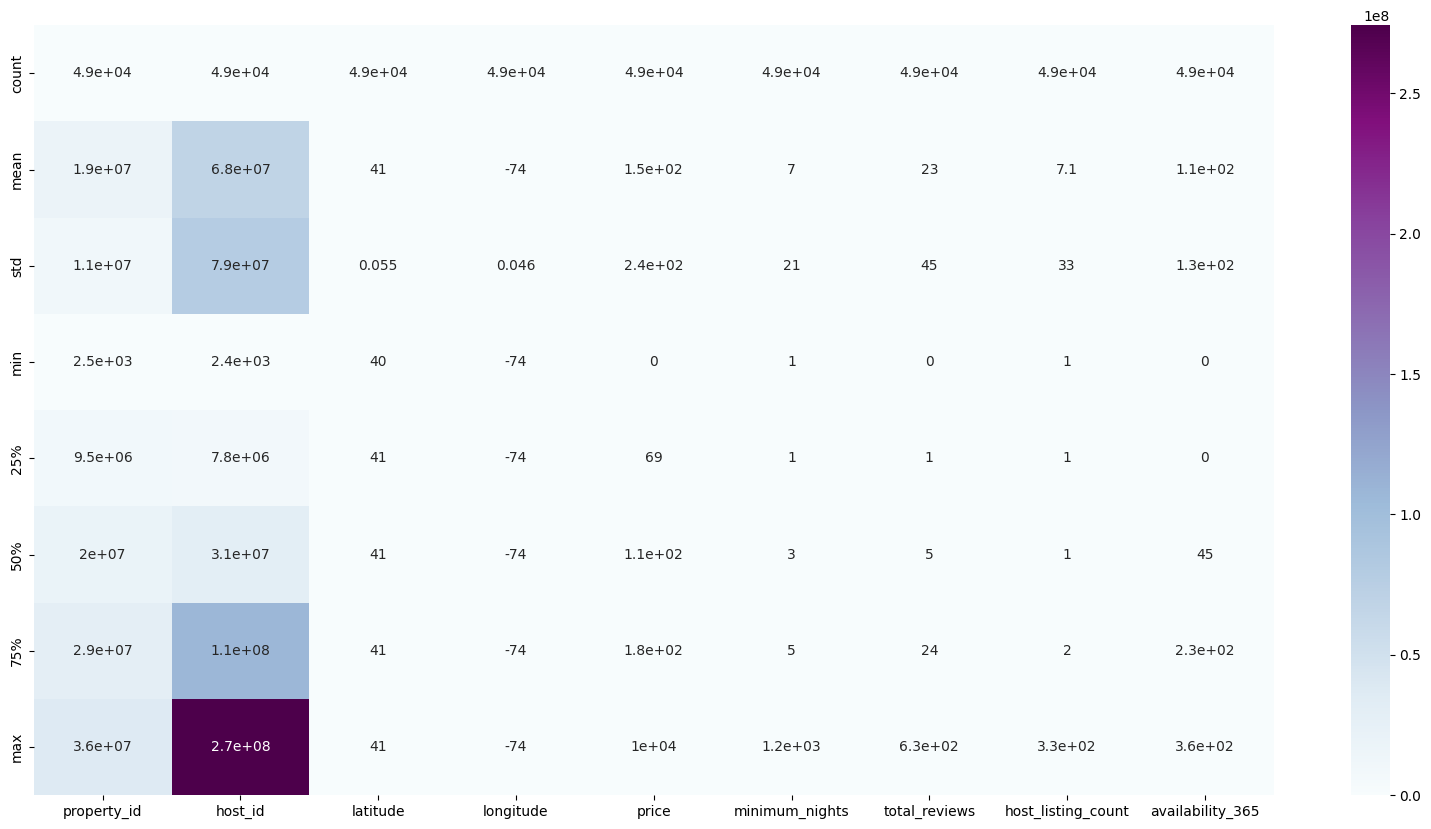

In [45]:
df.describe().T
plt.figure(figsize = (20, 10))
sns.heatmap(df.describe(), annot=True, cmap = 'BuPu') # 1/100 -> 2 point round

Inference:

1. There average number of nights is 7
2. The average pricing is $152
3. The average number of reviews for each property is 23
4. A property on an average they are available for 4 months or 112 days

In [47]:
df.describe(include = 'O').T

,count,unique,top,freq
property_name,48895,47906,Hillside Hotel,18
host_name,48895,11453,Michael,417
neighbourhood_group,48895,5,Manhattan,21661
neighbourhood,48895,221,Williamsburg,3920
room_type,48895,3,Entire home/apt,25409
reviews_per_month,48895,1,int64,48895


Insights:

1. The property named 'Hillside Hotel' the most famous most Famous AiBnB property since it has occured 18 times

2. The host named 'Micheal' is the busiest host as seen in the tables

3. With respect to the type of rooms, the entire home or apt are the favourite choices

4. Manhattan is the busiest and most famous areas to book

5. Willamsburgs in the most booked neighbourhood

**Outliers Detection**

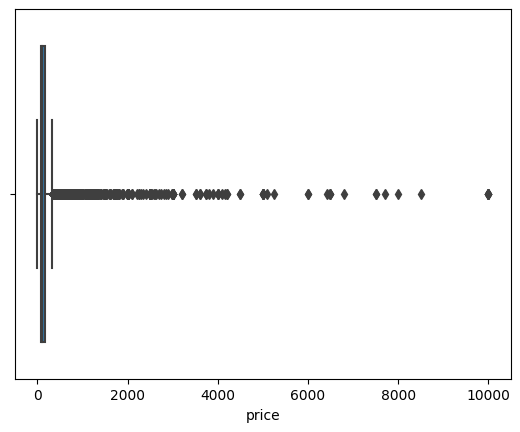

In [48]:
sns.boxplot(x = df['price'])
plt.show()

In [49]:
import plotly.express as px

In [50]:
fig = px.box(df, y='price')
fig.show()

In [51]:
# IQR and elimination
def iqr_sol(dfCol):
  q1 = np.percentile(dfCol, 25)
  q3 = np.percentile(dfCol, 75)

  IQR = q3 - q1

  LR = q1 - (1.5*IQR)
  UR = q3 + (1.5*IQR)

  return LR, UR

In [52]:
LB, UB = iqr_sol(df['price'])
LB, UB

(-90.0, 334.0)

In [54]:
df = df[(df.price>=LB) & (df.price<=UB)]

In [55]:
fig = px.box(df, y='price')
fig.show()

**Step 5: Visualization**

In order to support the conclusion

Text(0.5, 1.0, 'Distribution of the AirBnB properties pricing')

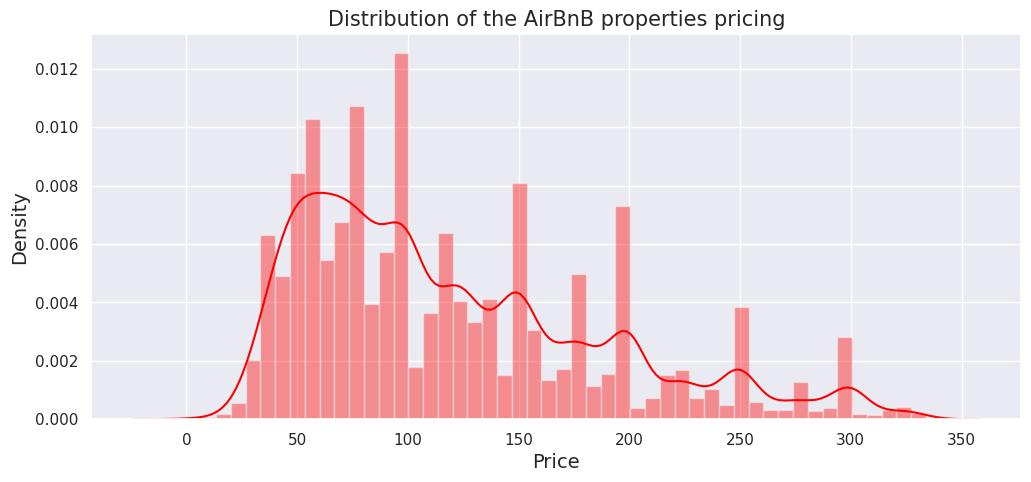

In [62]:
# using histogram we are going to carry out the distribution of data
# it will give us the overview of the data for population if they are
# densely populated or not
plt.figure(figsize=(12, 5))
sns.set_theme(style='darkgrid')
sns.distplot(df['price'], color = 'red')
plt.xlabel('Price', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

plt.title('Distribution of the AirBnB properties pricing', fontsize = 15)

In [63]:
import plotly.express as px
import pandas as pd

fig = px.histogram(df, x='price', nbins = 10, title = 'Distribution of the AirBnB properties pricing',
                   labels={'price':'Price', 'count':'Density'})
fig.update_layout(xaxis_title = 'Price', yaxis_title='Density', bargap = 0.1)
fig.show()

In [64]:
# neighbourhood_groupa
fig = px.histogram(df, x = 'neighbourhood_group', title = 'Neighbourhood listing in NYC',
                   labels = {'neighbourshood_group': 'Neighbourhood Group', 'count':'Total Count of the listing'})
fig.update_layout(xaxis_title = 'Neighbourhood Group', yaxis_title = 'Total Listing')
fig.show()

Text(0.5, 1.0, 'Avg price v/s neighbourhood')

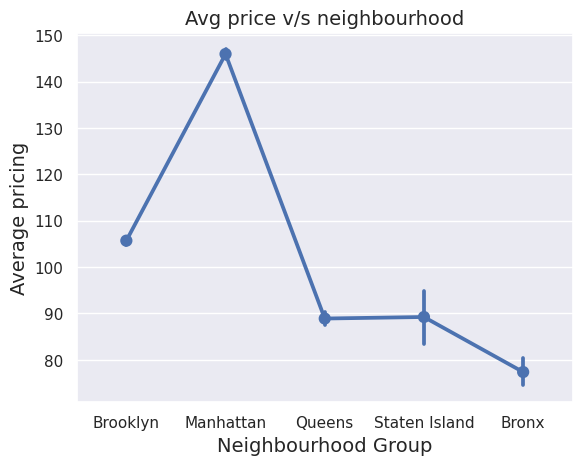

In [66]:
# neighbourhood_group column being used to calculate the avg pricing in each of these neighborhoods by using point plot
# we use mean over here to calculate the avg pricing
# point plot to do so

from statistics import mean

sns.pointplot(x='neighbourhood_group', y='price', data=df, estimator=np.mean)

plt.xlabel('Neighbourhood Group',fontsize=14)
plt.ylabel('Average pricing',fontsize=14)

plt.title('Avg price v/s neighbourhood',fontsize=14)

In [68]:
# sweetvix
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 27.7 MB/s eta 0:00:00


In [69]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html('report_bnb.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report_bnb.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [73]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.3 MB/s eta 0:00:00


In [75]:
import pandas as pd
from ydata_profiling import ProfileReport

ImportError: ignored